In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pwd
%cd /content/drive/MyDrive/LSTM\ project/LSTM

/content
/content/drive/MyDrive/LSTM project/LSTM


In [4]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [5]:
# read 5 companies (2017/01/01~2020/12/31)
df1=pd.read_csv("AAPL_5.csv")
df2=pd.read_csv("MSFT_5.csv")
df3=pd.read_csv("TSLA_5.csv")
df4=pd.read_csv("NFLX_5.csv")
df5=pd.read_csv("CRM_5.csv")
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape)
df3.tail()

(1006, 7) (1006, 7) (1006, 7) (1006, 7) (1006, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
1001,2020-12-23,632.200012,651.500000,622.570007,645.979980,645.979980,33173000
1002,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
1003,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
1004,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
1005,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


In [6]:
# extraxt training data
df1_tr=df1.iloc[:754, 2:3].values
df1_ts=df1.iloc[754:, 2:3].values

df2_tr=df2.iloc[:754, 2:3].values
df2_ts=df2.iloc[754:, 2:3].values

df3_tr=df3.iloc[:754, 2:3].values
df3_ts=df3.iloc[754:, 2:3].values

df4_tr=df4.iloc[:754, 2:3].values
df4_ts=df4.iloc[754:, 2:3].values

df5_tr=df5.iloc[:754, 2:3].values
df5_ts=df5.iloc[754:, 2:3].values

In [7]:
# combine 5 companies
training_set=np.hstack((df1_tr, df2_tr, df3_tr, df4_tr, df5_tr))

# feature scaling
ss=StandardScaler()
scaled_training_set=ss.fit_transform(training_set)
print(scaled_training_set.shape)

(754, 5)


In [8]:
# Creating a data structure with 60 time-steps
X_train=[]
y_train_aapl=[]
y_train_msft=[]
y_train_tsla=[]
y_train_nflx=[]
y_train_crm=[]
for i in range(60, 754): 
  X_train.append(scaled_training_set[i-60: i, :])
  y_train_aapl.append(scaled_training_set[i, 0])
  y_train_msft.append(scaled_training_set[i, 1])
  y_train_tsla.append(scaled_training_set[i, 2])
  y_train_nflx.append(scaled_training_set[i, 3])
  y_train_crm.append(scaled_training_set[i, 4])

X_train=np.array(X_train)
y_train_aapl=np.array(y_train_aapl)
y_train_msft=np.array(y_train_msft)
y_train_tsla=np.array(y_train_tsla)
y_train_nflx=np.array(y_train_nflx)
y_train_crm=np.array(y_train_crm)
print(X_train.shape, y_train_aapl.shape)

(694, 60, 5) (694,)


In [9]:
model_list = []
y_train = [y_train_aapl, y_train_msft, y_train_tsla, y_train_nflx, y_train_crm]
ind = ["<AAPL>", "<MSFT>", "<TSLA>", "<NFLX>", "<CRM>" ]
for i in range(5):
  print(ind[i])
  model = Sequential()
  #Adding the first LSTM layer and some Dropout regularisation
  # ここのinput_shapeで入力次元を設定する
  model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  # Adding a second LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a third LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50, return_sequences = True))
  model.add(Dropout(0.2))
  # Adding a fourth LSTM layer and some Dropout regularisation
  model.add(LSTM(units = 50))
  model.add(Dropout(0.2))
  # Adding the output layer
  model.add(Dense(units = 1))

  # Compiling the RNN
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  model.fit(X_train, y_train[i], epochs = 30, batch_size = 32)
  model_list.append(model)
  print("")

<AAPL>
Epoch 1/30
22/22 [==============================] - 8s 106ms/step - loss: 0.5380
Epoch 2/30
22/22 [==============================] - 2s 112ms/step - loss: 0.0734
Epoch 3/30
22/22 [==============================] - 2s 106ms/step - loss: 0.0581
Epoch 4/30
22/22 [==============================] - 2s 107ms/step - loss: 0.0512
Epoch 5/30
22/22 [==============================] - 2s 108ms/step - loss: 0.0460
Epoch 6/30
22/22 [==============================] - 2s 109ms/step - loss: 0.0407
Epoch 7/30
22/22 [==============================] - 2s 107ms/step - loss: 0.0495
Epoch 8/30
22/22 [==============================] - 2s 107ms/step - loss: 0.0393
Epoch 9/30
22/22 [==============================] - 2s 108ms/step - loss: 0.0372
Epoch 10/30
22/22 [==============================] - 3s 114ms/step - loss: 0.0337
Epoch 11/30
22/22 [==============================] - 2s 107ms/step - loss: 0.0373
Epoch 12/30
22/22 [==============================] - 2s 111ms/step - loss: 0.0342
Epoch 13/30
22/22 

KeyboardInterrupt: ignored

In [11]:
# Getting the predicted stock price 
dataset_train_a = df1.iloc[:754, 2:3]
dataset_test_a = df1.iloc[754:, 2:3]

dataset_train_m = df2.iloc[:754, 2:3]
dataset_test_m = df2.iloc[754:, 2:3]

dataset_train_t = df3.iloc[:754, 2:3]
dataset_test_t = df3.iloc[754:, 2:3]

dataset_train_n = df4.iloc[:754, 2:3]
dataset_test_n = df4.iloc[754:, 2:3]

dataset_train_c = df5.iloc[:754, 2:3]
dataset_test_c = df5.iloc[754:, 2:3]



dataset_total_a = pd.concat((dataset_train_a, dataset_test_a), axis = 0) 
dataset_total_m = pd.concat((dataset_train_m, dataset_test_m), axis = 0) 
dataset_total_t = pd.concat((dataset_train_t, dataset_test_t), axis = 0) 
dataset_total_n = pd.concat((dataset_train_n, dataset_test_n), axis = 0) 
dataset_total_c = pd.concat((dataset_train_c, dataset_test_c), axis = 0) 

# ここで、test用にのデータを改めて作成している
inputs_a = dataset_total_a[len(dataset_total_a) - len(dataset_test_a) - 60:].values
inputs_m = dataset_total_m[len(dataset_total_m) - len(dataset_test_m) - 60:].values
inputs_t = dataset_total_t[len(dataset_total_t) - len(dataset_test_t) - 60:].values
inputs_n = dataset_total_n[len(dataset_total_n) - len(dataset_test_n) - 60:].values
inputs_c = dataset_total_c[len(dataset_total_c) - len(dataset_test_c) - 60:].values
print(f"inputs = {inputs_a.shape}, {inputs_m.shape}, {inputs_t.shape}, {inputs_n.shape}, {inputs_c.shape}")

## 以下複数normをする目的は、最後のvisualisationで要素毎にinverseする必要がある
s_aapl = StandardScaler()
ss_aapl = s_aapl.fit_transform(inputs_a)

s_msft = StandardScaler()
ss_msft = s_msft.fit_transform(inputs_m)

s_tsla = StandardScaler()
ss_tsla = s_tsla.fit_transform(inputs_t)

s_nflx = StandardScaler()
ss_nflx = s_nflx.fit_transform(inputs_n)

s_crm = StandardScaler()
ss_crm = s_crm.fit_transform(inputs_c)


# X_testの実験用に全てをcombineしている
hstack=np.hstack((ss_aapl, ss_msft, ss_tsla, ss_nflx, ss_crm))
ss=StandardScaler()
inputs2=ss.fit_transform(hstack) #(252, 5)
print(f"inputs2 = {inputs2.shape}")

X_test = []
# for j in range(inputs.shape[1]):
# testデータも全ての5要素をinputとして使う
for i in range(60, 312):
  X_test.append(inputs2[i-60:i, :])

X_test = np.array(X_test)
print(X_test.shape)

# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape) # need 3d 
# (252, 60, 5)

print(dataset_test_a)

inputs = (312, 1), (312, 1), (312, 1), (312, 1), (312, 1)
inputs2 = (312, 5)
(252, 60, 5)
(252, 60, 5)
            High
754    75.150002
755    75.144997
756    74.989998
757    75.224998
758    76.110001
...          ...
1001  132.429993
1002  133.460007
1003  137.339996
1004  138.789993
1005  135.990005

[252 rows x 1 columns]


In [ ]:
p_a = np.array(model_list[0].predict(X_test))
p_m = np.array(model_list[1].predict(X_test))
p_t = np.array(model_list[2].predict(X_test))
p_n = np.array(model_list[3].predict(X_test))
p_c = np.array(model_list[4].predict(X_test))

print(p_a.shape)

""" Inverse(for visualisation) """
# inverseするときは最後の直前の変換の型を指定しないとエラーが出る
p_a = s_aapl.inverse_transform(p_a) 
p_m = s_msft.inverse_transform(p_m) 
p_t = s_tsla.inverse_transform(p_t) 
p_n = s_nflx.inverse_transform(p_n) 
p_c = s_crm.inverse_transform(p_c) 
print(p_a[0])
print(p_a.shape)

(252, 1)
[69.66522]
(252, 1)


R2[Apple]=0.7448186780135448


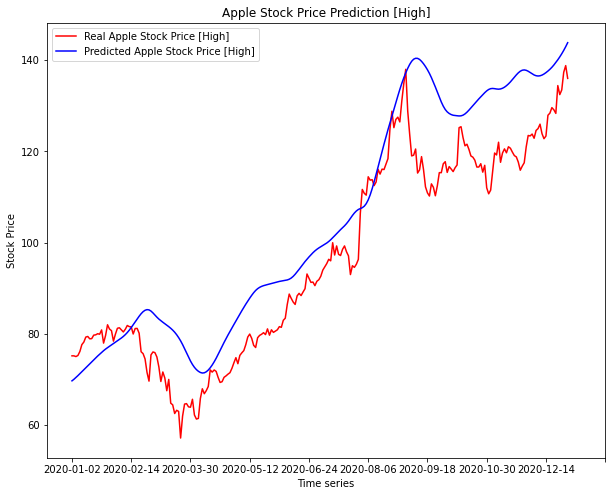

R2[Microsoft]=0.6063625943783546


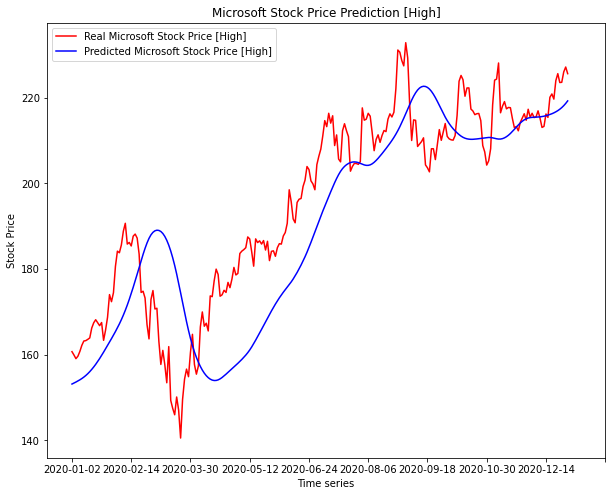

R2[Tesla]=0.5184246294438546


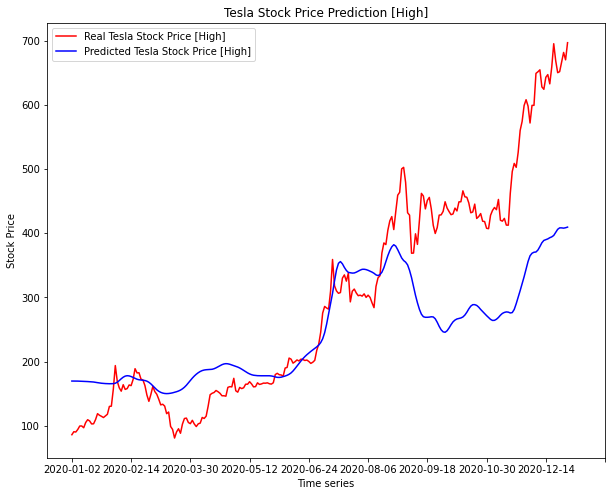

R2[Netflix]=0.1158808563096011


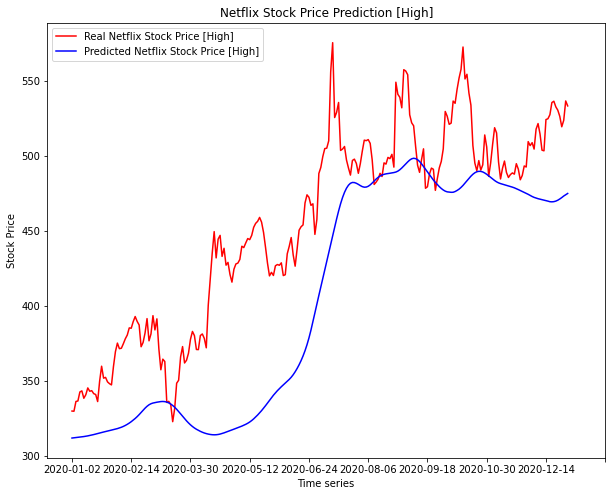

R2[Salesforce]=0.7019329594550162


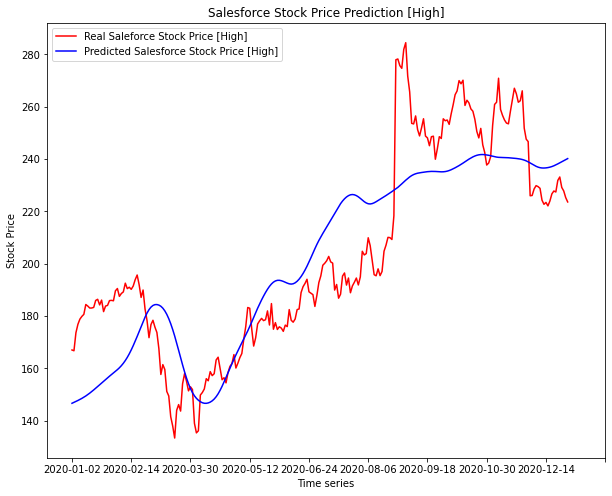

In [ ]:
# Visualising the results <Lag1>
preds_list=[p_a, p_m, p_t, p_n, p_c]
actual_list=[dataset_test_a, dataset_test_m, dataset_test_t, dataset_test_n, dataset_test_c]

actual_label=["Real Apple Stock Price [High]","Real Microsoft Stock Price [High]","Real Tesla Stock Price [High]",
              "Real Netflix Stock Price [High]","Real Saleforce Stock Price [High]"]

preds_label=["Predicted Apple Stock Price [High]", "Predicted Microsoft Stock Price [High]", "Predicted Tesla Stock Price [High]", 
             "Predicted Netflix Stock Price [High]", "Predicted Salesforce Stock Price [High]"]

title=["Apple Stock Price Prediction [High]", "Microsoft Stock Price Prediction [High]", "Tesla Stock Price Prediction [High]", 
       "Netflix Stock Price Prediction [High]", "Salesforce Stock Price Prediction [High]"]      

R2 = ["Apple", "Microsoft", "Tesla", "Netflix", "Salesforce"]

for i in range(5):
  plt.figure(figsize=(10, 8)) #754
  plt.plot(df1.loc[754:,'Date'], actual_list[i], color='red', label=actual_label[i])
  plt.plot(df1.loc[754:,'Date'], preds_list[i], color='blue', label=preds_label[i])

  from sklearn.metrics import r2_score

  plt.xticks(np.arange(0, 300, 30))
  plt.title(title[i])
  plt.xlabel('Time series')
  plt.ylabel('Stock Price')

  print(f"R2[{R2[i]}]={r2_score(actual_list[i], preds_list[i].flatten())}")
  plt.legend()
  plt.show()

  # My assumption: the longer the prediction period (over5 years) is, the more reliable results I may get 